## Importation des librairies nécessaires

In [24]:
import pandas as pd
import numpy as np
import pickle
import re

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Importation des données

In [27]:
data = pd.read_csv('morocco_world_news_articles.csv')
X, y = data.content, data.category

## Visualisation des catégories

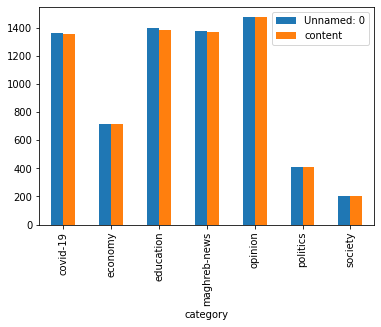

In [28]:
data.groupby('category').count().plot.bar(ylim=0)

## Preprocessing des données

In [29]:
stemmer = WordNetLemmatizer()

documents = []

for sen in range(0, len(X)):
  # suppresion des caractères spéciaux
  document = re.sub(r'\W', ' ', str(X[sen]))
  # suppresion des caractères uniques
  document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
  document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
  # suppresion des espaces multiples
  document = re.sub(r'\s+', ' ', document, flags=re.I)
  # suppresion des préfixes b
  document = re.sub(r'^b\s+', '', document)
  # concersion en minuscule
  document = document.lower()
  # lemmatisation
  document = document.split()
  document = [stemmer.lemmatize(word) for word in document]
  document = ' '.join(document)
  # ajout à la liste
  documents.append(document)

## Bag Of Words

In [30]:
# conversion des données textuelles en données numériques
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

## TF - IDF

In [32]:
# Term Frequency = Nombre d'occurences d'un mot / Nombre total des mots dans le document
# Inverse Document Frequency = log(Nombre total de documents / Nombre de documents contenant le mot)
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

## Entraînement du modèle

In [34]:
# division des données en données d'entrapînement (80%) et données de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# utilisation de l'algorithme des forêts aléatoires sur nos données d'netraînement
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

In [36]:
# prédiction à partir de nos données de test
y_pred = classifier.predict(X_test)

## Evaluation du modèle

In [40]:
# évaluation du score globale du modèle
print(accuracy_score(y_test, y_pred))

0.8304597701149425


In [41]:
# évaluation de la précision : taux de prédictions positives correctes
# évaluation du recall : taux de positifs correctement prédits
# évaluation du f1-score : capacité d'un modèle à bien prédire les individus positifs
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    covid-19       0.88      0.92      0.90       277
     economy       0.75      0.79      0.77       130
   education       0.80      0.88      0.84       279
maghreb-news       0.83      0.88      0.86       294
     opinion       0.84      0.92      0.88       280
    politics       0.89      0.37      0.52        84
     society       1.00      0.12      0.22        48

    accuracy                           0.83      1392
   macro avg       0.85      0.70      0.71      1392
weighted avg       0.84      0.83      0.82      1392



## Sauvegarde du modèle

In [42]:
# sauvegarde du modèle en tant qu'objet pickle
with open('morocco_world_news_classifier', 'wb') as picklefile:
  pickle.dump(classifier, picklefile)

## Chargement du modèle

In [43]:
# chargement du modèle à partir du fichier morocco_world_news_classifier
with open('morocco_world_news_classifier', 'rb') as training_model:
  model = pickle.load(training_model)

## Vérification du modèle

In [44]:
# prédiction à partir des données de test
y_pred2 = model.predict(X_test)

In [45]:
# évaluation du score global
print(accuracy_score(y_test, y_pred))

0.8304597701149425


In [46]:
# évaluation de la précision, du recall et du f1-score
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

    covid-19       0.88      0.92      0.90       277
     economy       0.75      0.79      0.77       130
   education       0.80      0.88      0.84       279
maghreb-news       0.83      0.88      0.86       294
     opinion       0.84      0.92      0.88       280
    politics       0.89      0.37      0.52        84
     society       1.00      0.12      0.22        48

    accuracy                           0.83      1392
   macro avg       0.85      0.70      0.71      1392
weighted avg       0.84      0.83      0.82      1392

